# Computer Vision Coursework Submission (IN3060)

**Student name, ID and cohort:** Youssef Ayman Abdelmoamen (190054712) - UG


# Notebook Setup
In this section you should include all the code cells required to test your coursework submission. Specifically:

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Define Local Path

In the next cell you should assign to the variable `GOOGLE_DRIVE_PATH_AFTER_MYDRIVE` the relative path of this folder in your Google Drive.

**IMPORTANT:** you have to make sure that **all the files required to test your functions are loaded using this variable** (as was the case for all lab tutorials). In other words, do not use in the notebook any absolute paths. This will ensure that the markers can run your functions. Also, **do not use** the magic command `%cd` to change directory.



In [2]:
import os

# TODO: Fill in the Google Drive path where you uploaded the CW_folder_UG
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision/CW_folder_UG'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CW_Folder_UG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))
test_image_folder=os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'CW_Dataset','CV2023_CW_Dataset','test','images')
test_label_folder=os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'CW_Dataset','CV2023_CW_Dataset','test','labels')

['Report template.docx', '.DS_Store', 'CW_Dataset', '.ipynb_checkpoints', 'Models', 'test_functions.ipynb']


### Load packages 

In the next cell you should load all the packages required to test your functions.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from joblib import dump, load
import pickle

### Load models

In the next cell you should load all your trained models for easier testing of your functions. Avoid to load them within `MaskDetection` to avoid having to reload them each time.

In [4]:
svm_classifier = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models','SVM+HOG.joblib'))
mlp = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models','MLP+HOG.joblib'))
cnn = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models','CNN.joblib'))

# Test MaskDetection

This section should allow a quick test of the `MaskDetection` function. First, add cells with the code needed to load the necessary subroutines to make `MaskDetection` work.

In [5]:
import cv2
test_images = []
test_labels = []
for filename in os.listdir(test_image_folder):
        img = cv2.imread(os.path.join(test_image_folder, filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64)) # Resize the image to 64x64
        test_images.append(img)
        label_file = os.path.join(test_label_folder, f"{os.path.splitext(filename)[0]}.txt")
        with open(label_file, "r") as f:
            label = int(f.read().strip())
            test_labels.append(label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)  # Load the test data and labels
def MaskDetection(path_to_testset, model_type):
   
    # Load the corresponding model
    if model_type == 'cnn':
        model = cnn
    elif model_type == 'hog_svm':
        model = svm_classifier
    elif model_type == 'hog_mlp':
        model = mlp
    else:
        print('Invalid model type.')
        return

    


    # Randomly select 4 images from the test set
    sample_indices = np.random.choice(test_images.shape[0], size=4, replace=False)
    sample_images = test_images[sample_indices]
    sample_labels = test_labels[sample_indices]
    
    # Reshape the sample images to 2D arrays
    sample_images = sample_images.reshape((sample_images.shape[0], -1))
    
    # Make predictions on the sample images
    predictions = model.predict(sample_images)
    
    # Display the sample images with their predictions and ground-truth labels
    fig, axs = plt.subplots(1, 4, figsize=(15, 3))
    for i in range(4):
        axs[i].imshow(sample_images[i].reshape((64, 64)), cmap='gray')
        axs[i].set_title(f"Prediction: {predictions[i]}, Label: {sample_labels[i]}")
        axs[i].axis('off')
    plt.show()


Then, make a call to the `MaskDetection` function to see what results it produces. You must also indicate the syntax needed to test your different models.

In [6]:
print(len(test_images))
print(test_images.shape)


458
(458, 64, 64)


In [7]:
# Syntax for the next function is the following:
# 
# MaskDetection(path_to_testset, model_type)
# 
# where model_type can be one of
#   - hog-svm
#   - hog-mlp
#   - cnn

path_to_testset = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset', 'CV2023_CW_Dataset', 'test')
MaskDetection(path_to_testset, 'hog_mlp')

ValueError: ignored

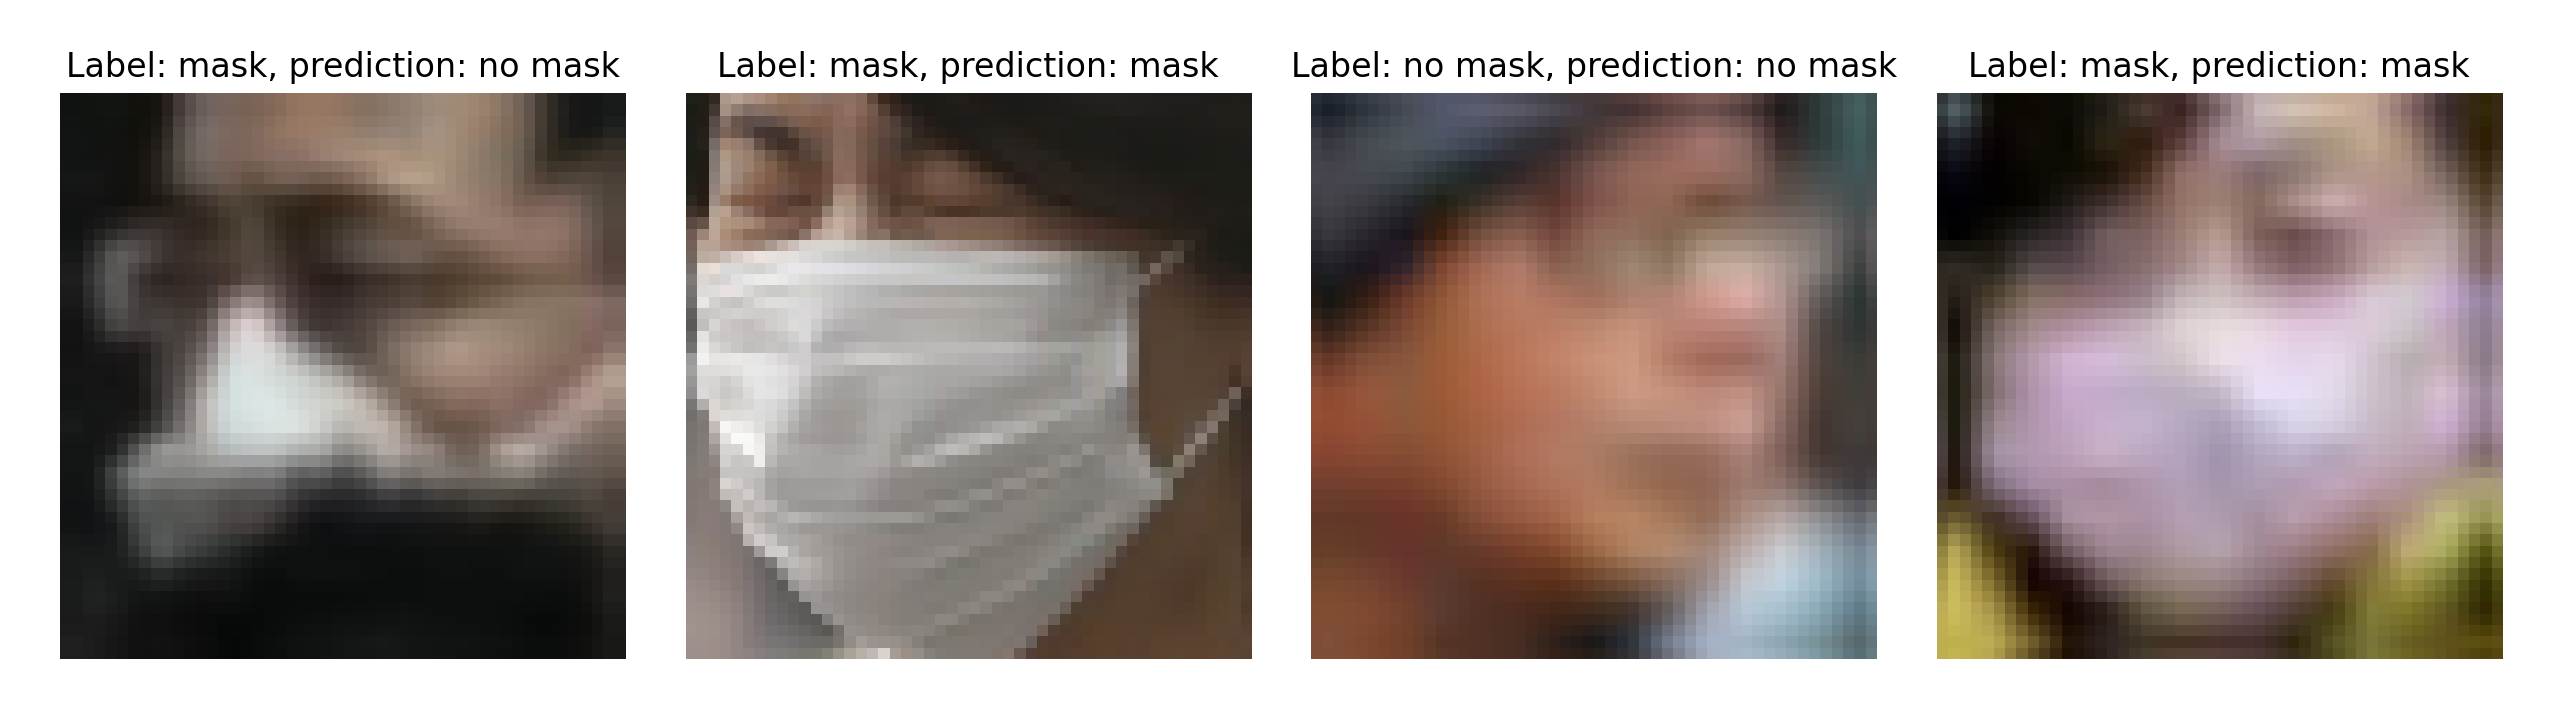

# Test MaskDetection in the wild

This section should allow a quick test of the `MaskDetection` on your `Personal_Dataset`.

In [ ]:
# Syntax for the next function is the following:
# 
# MaskDetection(path_to_testset, model_type)
# 
# where model_type can be one of
#   - hog-svm
#   - hog-mlp
#   - cnn

path_to_testset = os.path.join(GOOGLE_DRIVE_PATH, 'Personal_Dataset')
MaskDetection(path_to_testset, 'hog-svm')